In [40]:
#libraries for preprocessing
import pandas as pd
import numpy as np
#libiraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#dataframe
df=pd.read_csv("titanic-passengers.csv", sep=';')
df=df.sort_index()

df['Cabin'].fillna('G6',inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna('S',inplace=True) 

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,G6,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,G6,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,G6,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,G6,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,G6,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

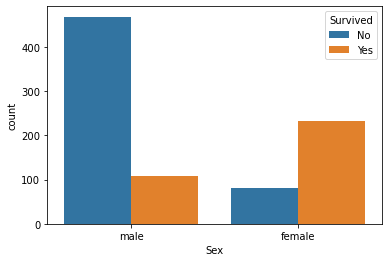

In [13]:
# visualizing the Sex distribution 
sns.countplot(x='Sex',hue='Survived',data=df)


<AxesSubplot:xlabel='Age', ylabel='count'>

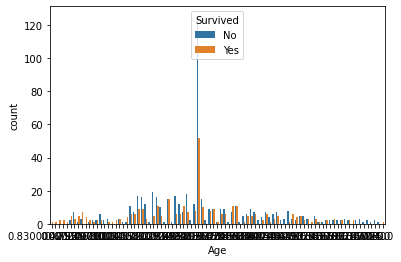

In [87]:
# visualizing the Age distribution 
sns.countplot(x='Age',hue='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

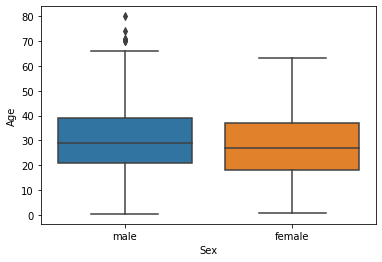

In [11]:
# the correlation between Sex and Age
sns.boxplot(data=df, x='Sex', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='count'>

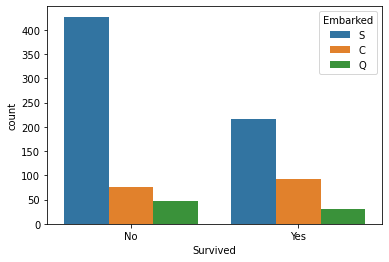

In [10]:
# the correlation between Pclass and Fare
sns.countplot(x='Survived',hue='Embarked',data=df )

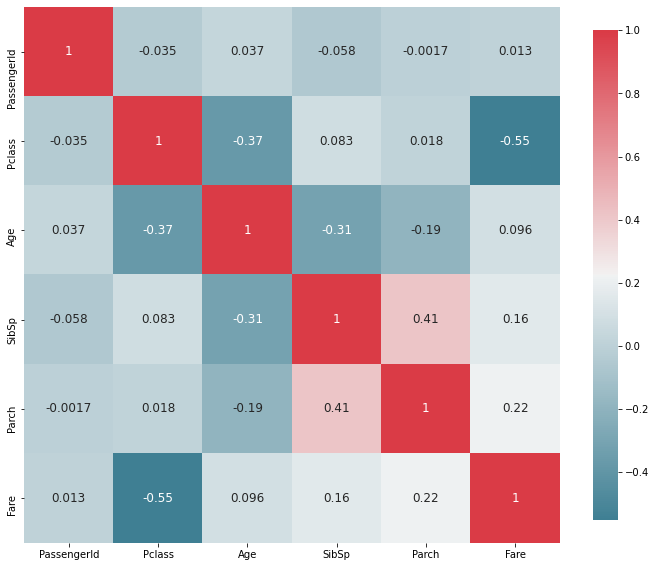

In [9]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map( df )

# this function projects to us the correlation between the variables in the dataset.
# the individual values that are contained in a matrix are represented as colors
# helps us when trying to make predictions 
# The correlation between variables range from -1 to 1
# the "-1" is the negative correlation
# the "1" is the positive correlation
# the "0" shows us that there is no correlation between the variables

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

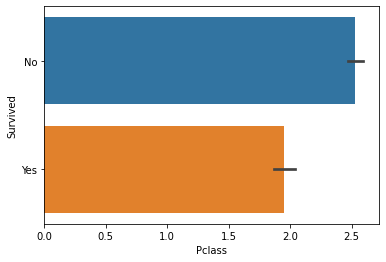

In [7]:
import seaborn as sns
import pandas as pd
df=pd.read_csv("titanic-passengers.csv", sep=';')
sns.barplot(x='Pclass',y='Survived',data=df)

In [83]:
# the goupby function
df.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      No         410.300000  40.896074  0.287500  0.300000  64.684008
       Yes        491.772059  34.784615  0.492647  0.389706  95.608029
2      No         452.123711  33.266947  0.319588  0.144330  19.412328
       Yes        439.080460  26.076166  0.494253  0.643678  22.055700
3      No         453.580645  27.417500  0.672043  0.384409  13.669364
       Yes        394.058824  23.232689  0.436975  0.420168  13.694887

In [42]:
#Dropping name and adding the title column
import pandas as pd
df=pd.read_csv("titanic-passengers.csv", sep=';')
l={}
for column in df["Name"]:
    x=column.split(',')[1]
    x=x.split('.')[0]
    l[column]=x
df["Title"]=l;
df.drop('Name',inplace=True,axis=1)
df.head(12)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,"Collander, Mr. Erik Gustaf"
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,"Moen, Mr. Sigurd Hansen"
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,"Jensen, Mr. Hans Peder"
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,"Palsson, Mrs. Nils (Alma Cornelia Berglund)"
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,"Davidson, Mr. Thornton"
5,105,No,3,male,37.0,2,0,3101276,7.9250,NaN,S,"Gustafsson, Mr. Anders Vilhelm"
6,576,No,3,male,19.0,0,0,358585,14.5000,NaN,S,"Patchett, Mr. George"
7,382,Yes,3,female,1.0,0,2,2653,15.7417,NaN,C,"Nakid, Miss. Maria (""Mary"")"
8,228,No,3,male,20.5,0,0,A/5 21173,7.2500,NaN,S,"Lovell, Mr. John Hall (""Henry"")"
9,433,Yes,2,female,42.0,1,0,SC/AH 3085,26.0000,NaN,S,"Louch, Mrs. Charles Alexander (Alice Adelaide ..."


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,"Collander, Mr. Erik Gustaf"
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,"Moen, Mr. Sigurd Hansen"
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,"Jensen, Mr. Hans Peder"
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,"Palsson, Mrs. Nils (Alma Cornelia Berglund)"
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,"Davidson, Mr. Thornton"
5,105,No,3,male,37.0,2,0,3101276,7.9250,NaN,S,"Gustafsson, Mr. Anders Vilhelm"
6,576,No,3,male,19.0,0,0,358585,14.5000,NaN,S,"Patchett, Mr. George"
7,382,Yes,3,female,1.0,0,2,2653,15.7417,NaN,C,"Nakid, Miss. Maria (""Mary"")"
8,228,No,3,male,20.5,0,0,A/5 21173,7.2500,NaN,S,"Lovell, Mr. John Hall (""Henry"")"
9,433,Yes,2,female,42.0,1,0,SC/AH 3085,26.0000,NaN,S,"Louch, Mrs. Charles Alexander (Alice Adelaide ..."


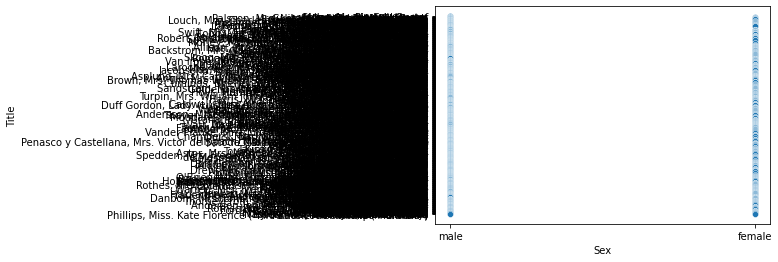

In [32]:
import seaborn as sns
cleanup={"Sex":{"male":0, "female": 1}}
df.replace(cleanup)
df
sns.scatterplot(x="Sex", y="Title", data=df);
Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty",

                    "Don": "Royalty",

                    "Sir" : "Royalty",

                   "Lady" : "Royalty",

                  "the Countess": "Royalty",

                    "Dona": "Royalty",

                    "Mme": "Miss",

                    "Mlle": "Miss",

                    "Miss" : "Miss",

                    }

for i in range(len(df["Title"])):
    for j in Title_Dictionary:
        if j==df["Title"][i]:
            df["Title"][i]=Title_Dictionary[j]
df.head(15)

In [44]:
TitleFam=[]
for i in range (0,891) :
    ch=Title_Dictionary[df['Title'][i]]
    TitleFam.append(ch)
df['TitleFam']=TitleFam
df.head(10)

KeyError: 'Collander, Mr. Erik Gustaf'